In [72]:
#Import des librairies nécessaire pour la suite du projet.
import pandas as pd 
import matplotlib.pyplot as plt

In [73]:
#Import de mes fichiers csv qui vont servir à la suite du projet.
population = pd.read_csv(r'C:\Users\Jonathan.Gourville\Desktop\p4_donnes\population.csv', delimiter=',')
sous_nutrition = pd.read_csv(r'C:\Users\Jonathan.Gourville\Desktop\p4_donnes\sous_nutrition.csv', delimiter =',')
aide_alimentaire = pd.read_csv(r'C:\Users\Jonathan.Gourville\Desktop\p4_donnes\aide_alimentaire.csv', delimiter =',')
dispo_alimentaire = pd.read_csv(r'C:\Users\Jonathan.Gourville\Desktop\p4_donnes\dispo_alimentaire.csv', delimiter =',')

Population

In [74]:
#infos sur le head de population afin d'avoir le nom des colonnes et les changer si nécessaire
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [75]:
#infos sur la data frame population pour savoir quel type de données nous avons
population['Valeur'] *=1000
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [76]:
#Vérification si valeur manquantes ou pas dans la table population 
print(population.isnull().sum())

Zone      0
Année     0
Valeur    0
dtype: int64


In [77]:
#Rename des colonnes de la table population pour les jointures ensuite
population.rename(columns={'Valeur':'Population(K)'}, inplace = True)
population.rename(columns={'Zone':'Pays'}, inplace = True)
print(population)

             Pays  Année  Population(K)
0     Afghanistan   2013     32269589.0
1     Afghanistan   2014     33370794.0
2     Afghanistan   2015     34413603.0
3     Afghanistan   2016     35383032.0
4     Afghanistan   2017     36296113.0
...           ...    ...            ...
1411     Zimbabwe   2014     13586707.0
1412     Zimbabwe   2015     13814629.0
1413     Zimbabwe   2016     14030331.0
1414     Zimbabwe   2017     14236595.0
1415     Zimbabwe   2018     14438802.0

[1416 rows x 3 columns]


sous_nutrition

In [78]:
#infos sur le head de sous_nutrition afin d'avoir le nom des colonnes et les changer si nécessaire
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [79]:
#infos sur la data frame sous_nutrition pour savoir quel type de données nous avons
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [80]:
#Vérification si valeur manquantes ou pas dans la table sous_nutrition
print(sous_nutrition.isnull().sum())

Zone        0
Année       0
Valeur    594
dtype: int64


In [81]:
#Rename des colonnes de la table sous_nutrition pour les jointures ensuite
sous_nutrition.rename(columns={'Valeur':'Sous_alim(M_hab)'}, inplace = True)
sous_nutrition.rename(columns={'Zone':'Pays'}, inplace = True)
print(sous_nutrition)

             Pays      Année Sous_alim(M_hab)
0     Afghanistan  2012-2014              8.6
1     Afghanistan  2013-2015              8.8
2     Afghanistan  2014-2016              8.9
3     Afghanistan  2015-2017              9.7
4     Afghanistan  2016-2018             10.5
...           ...        ...              ...
1213     Zimbabwe  2013-2015              NaN
1214     Zimbabwe  2014-2016              NaN
1215     Zimbabwe  2015-2017              NaN
1216     Zimbabwe  2016-2018              NaN
1217     Zimbabwe  2017-2019              NaN

[1218 rows x 3 columns]


In [82]:
#Changement de la colonne année de sous nutrition en une seule année
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2012-2014','2013')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2013-2015','2014')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2014-2016','2015')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2015-2017','2016')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2016-2018','2017')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2017-2019','2018')
sous_nutrition['Année'] = sous_nutrition['Année'].astype(int)
print(sous_nutrition['Année'])

0       2013
1       2014
2       2015
3       2016
4       2017
        ... 
1213    2014
1214    2015
1215    2016
1216    2017
1217    2018
Name: Année, Length: 1218, dtype: int32


In [83]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pays              1218 non-null   object
 1   Année             1218 non-null   int32 
 2   Sous_alim(M_hab)  624 non-null    object
dtypes: int32(1), object(2)
memory usage: 23.9+ KB


In [84]:
sous_nutrition.describe()

,Année
count,1218.000000
mean,2015.500000
std,1.708527
min,2013.000000
25%,2014.000000
50%,2015.500000
75%,2017.000000
max,2018.000000


Aide Alimentaire

In [85]:
#Infos sur le head d'aide alimentaire afin d'avoir le nom des colonnes et les changer si nécessaire
aide_alimentaire['Valeur'] *= 1000
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [86]:
#infos sur la data frame aide_alimentaire pour savoir quel type de données nous avons
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [87]:
#Vérification si valeur manquantes ou pas dans la table aide_alimentaire
print(aide_alimentaire.isnull().sum())

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64


In [88]:
#Rename des colonnes de la table aide_alimentaire pour les jointures ensuite
aide_alimentaire.rename(columns={'Valeur':'Quantite(T)'}, inplace = True)
aide_alimentaire.rename(columns={'Pays bénéficiaire':'Pays'}, inplace = True)
aide_alimentaire.rename(columns={'Produit':'Cate_prod'}, inplace = True)
#aide_alimentaire.rename(columns={'Année':'Année aide_alim'}, inplace = True)
print(aide_alimentaire)

             Pays  Année                 Cate_prod  Quantite(T)
0     Afghanistan   2013       Autres non-céréales       682000
1     Afghanistan   2014       Autres non-céréales       335000
2     Afghanistan   2013              Blé et Farin     39224000
3     Afghanistan   2014              Blé et Farin     15160000
4     Afghanistan   2013                  Céréales     40504000
...           ...    ...                       ...          ...
1470     Zimbabwe   2015  Mélanges et préparations        96000
1471     Zimbabwe   2013              Non-céréales      5022000
1472     Zimbabwe   2014              Non-céréales      2310000
1473     Zimbabwe   2015              Non-céréales       306000
1474     Zimbabwe   2013                Riz, total        64000

[1475 rows x 4 columns]


Disponibilité Alimentaire

In [89]:
#infos sur le head de dispo_alimentaire afin d'avoir le nom des colonnes et les changer si nécessaire
dispo_alimentaire['Aliments pour animaux'] *=1000000
dispo_alimentaire['Disponibilité intérieure'] *=1000000
dispo_alimentaire['Exportations - Quantité'] *=1000000
dispo_alimentaire['Importations - Quantité'] *=1000000
dispo_alimentaire['Nourriture'] *=1000000
dispo_alimentaire['Pertes'] *=1000000
dispo_alimentaire['Production'] *=1000000
dispo_alimentaire['Semences'] *=1000000
dispo_alimentaire['Traitement'] *=1000000
dispo_alimentaire['Variation de stock'] *=1000000
dispo_alimentaire['Autres Utilisations'] *=1000000
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53000000.0,NaN,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2000000.0,NaN,2000000.0,2000000.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82000000.0,NaN,82000000.0,82000000.0,NaN,NaN,NaN,NaN,NaN


In [90]:
#infos sur la data frame dispo_alimentaire pour savoir quel type de données nous avons
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [91]:
#Vérification si valeur manquantes ou pas dans la table dispo_alimentaire
print(dispo_alimentaire.isnull().sum())

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [92]:
#Rename des colonnes de la table dispo_alimentaire pour les jointures ensuite
dispo_alimentaire.rename(columns={'Zone':'Pays'}, inplace = True)
print(dispo_alimentaire)

               Pays                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    NaN   
1       Afghanistan        Agrumes, Autres  vegetale                    NaN   
2       Afghanistan  Aliments pour enfants  vegetale                    NaN   
3       Afghanistan                 Ananas  vegetale                    NaN   
4       Afghanistan                Bananes  vegetale                    NaN   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    NaN   
15601  Îles Salomon    Viande de Volailles   animale                    NaN   
15602  Îles Salomon          Viande, Autre   animale                    NaN   
15603  Îles Salomon                    Vin  vegetale                    NaN   
15604  Îles Salomon         Épices, Autres  vegetale                    NaN   

       Autres Utilisations  Disponibilité alimentai

Jointure

In [93]:
#Etablissement d'une jointure inner entre population et sous_nutrition. 
popu_sounut = pd.merge(left = population, right= sous_nutrition, how="inner",on=["Pays","Année"])
popu_sounut.head()

,Pays,Année,Population(K),Sous_alim(M_hab)
0,Afghanistan,2013,32269589.0,8.6
1,Afghanistan,2014,33370794.0,8.8
2,Afghanistan,2015,34413603.0,8.9
3,Afghanistan,2016,35383032.0,9.7
4,Afghanistan,2017,36296113.0,10.5


In [94]:
popu_sounut.describe()

,Année,Population(K)
count,1218.000000,1.218000e+03
mean,2015.500000,3.653910e+07
std,1.708527,1.396015e+08
min,2013.000000,1.187000e+03
25%,2014.000000,1.370709e+06
50%,2015.500000,7.580050e+06
75%,2017.000000,2.520816e+07
max,2018.000000,1.427648e+09


In [95]:
#Jointure entre sousnut/population et dispo alimentaire.
popu_sounut_dispo = pd.merge(left=popu_sounut, right=dispo_alimentaire, how="inner", on=["Pays"])
print(popu_sounut_dispo)

              Pays  Année  Population(K) Sous_alim(M_hab)  \
0      Afghanistan   2013     32269589.0              8.6   
1      Afghanistan   2013     32269589.0              8.6   
2      Afghanistan   2013     32269589.0              8.6   
3      Afghanistan   2013     32269589.0              8.6   
4      Afghanistan   2013     32269589.0              8.6   
...            ...    ...            ...              ...   
92491     Zimbabwe   2018     14438802.0              NaN   
92492     Zimbabwe   2018     14438802.0              NaN   
92493     Zimbabwe   2018     14438802.0              NaN   
92494     Zimbabwe   2018     14438802.0              NaN   
92495     Zimbabwe   2018     14438802.0              NaN   

                     Produit   Origine  Aliments pour animaux  \
0           Abats Comestible   animale                    NaN   
1            Agrumes, Autres  vegetale                    NaN   
2      Aliments pour enfants  vegetale                    NaN   
3      

In [96]:
popu_sounut_dispo.describe()

,Année,Population(K),Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,92496.000000,9.249600e+04,1.602000e+04,3.253200e+04,84456.000000,83112.000000,69906.000000,68502.000000,9.117000e+04,7.224000e+04,8.799000e+04,8.311200e+04,2.529000e+04,5.443200e+04,1.238400e+04,1.346400e+04,4.006800e+04
mean,2015.500000,4.375442e+07,4.823978e+08,1.583864e+08,34.723075,8.689482,1.275234,1.222351,6.406007e+08,1.106311e+08,8.505592e+07,3.469192e+08,1.073032e+08,1.093625e+09,7.428149e+07,9.739933e+08,-1.536463e+07
std,1.707834,1.561043e+08,4.276516e+09,5.110866e+09,107.345420,24.539632,3.656161,3.596262,9.120092e+09,1.060682e+09,7.175115e+08,4.499039e+09,1.121207e+09,1.213606e+10,5.312984e+08,1.048818e+10,5.536422e+08
min,2013.000000,5.033100e+04,0.000000e+00,0.000000e+00,-21.000000,-1.930000,-0.030000,-0.370000,-3.430000e+09,-4.100000e+07,-2.010000e+08,-2.460000e+08,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e+07,-3.986300e+10
25%,2014.000000,2.881791e+06,0.000000e+00,0.000000e+00,0.000000,0.060000,0.010000,0.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.500000,9.602769e+06,4.000000e+06,0.000000e+00,4.000000,0.830000,0.080000,0.100000,7.000000e+06,0.000000e+00,1.000000e+06,5.000000e+06,4.000000e+06,2.200000e+07,2.000000e+06,6.000000e+06,0.000000e+00
75%,2017.000000,3.004297e+07,7.300000e+07,4.000000e+06,21.000000,5.182500,0.630000,0.660000,7.400000e+07,8.000000e+06,1.700000e+07,5.100000e+07,2.600000e+07,1.900000e+08,1.700000e+07,6.900000e+07,0.000000e+00
max,2018.000000,1.427648e+09,1.500000e+11,3.473090e+11,1711.000000,430.760000,60.760000,54.970000,7.392670e+11,4.279700e+10,6.338100e+10,4.268500e+11,5.504700e+10,7.392670e+11,1.706000e+10,3.267110e+11,5.284000e+09


In [97]:
#Jointure entre sousnut/population/dispo_ali et aide_ali
table_total = pd.merge(left=popu_sounut_dispo, right=aide_alimentaire, how="outer", on=["Année","Pays"])
print(table_total)

               Pays  Année  Population(K) Sous_alim(M_hab)           Produit  \
0       Afghanistan   2013     32269589.0              8.6  Abats Comestible   
1       Afghanistan   2013     32269589.0              8.6  Abats Comestible   
2       Afghanistan   2013     32269589.0              8.6  Abats Comestible   
3       Afghanistan   2013     32269589.0              8.6  Abats Comestible   
4       Afghanistan   2013     32269589.0              8.6  Abats Comestible   
...             ...    ...            ...              ...               ...   
188068    Swaziland   2014            NaN              NaN               NaN   
188069    Swaziland   2014            NaN              NaN               NaN   
188070    Swaziland   2014            NaN              NaN               NaN   
188071    Swaziland   2014            NaN              NaN               NaN   
188072    Swaziland   2014            NaN              NaN               NaN   

        Origine  Aliments pour animaux 

In [98]:
table_total.head()

,Pays,Année,Population(K),Sous_alim(M_hab),Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Cate_prod,Quantite(T)
0,Afghanistan,2013,32269589.0,8.6,Abats Comestible,animale,NaN,NaN,5.0,1.72,...,NaN,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN,Autres non-céréales,682000.0
1,Afghanistan,2013,32269589.0,8.6,Abats Comestible,animale,NaN,NaN,5.0,1.72,...,NaN,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN,Blé et Farin,39224000.0
2,Afghanistan,2013,32269589.0,8.6,Abats Comestible,animale,NaN,NaN,5.0,1.72,...,NaN,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN,Céréales,40504000.0
3,Afghanistan,2013,32269589.0,8.6,Abats Comestible,animale,NaN,NaN,5.0,1.72,...,NaN,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN,"Fruits secs, total",85000.0
4,Afghanistan,2013,32269589.0,8.6,Abats Comestible,animale,NaN,NaN,5.0,1.72,...,NaN,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN,Huiles végétales,11087000.0


Réponses pour Marc

In [99]:
#Conversion de la colonne sous alimentation en M habitant en float et imputation de valeurs aberrantes
popu_sounut['Sous_alim(M_hab)'] = popu_sounut['Sous_alim(M_hab)'].str.replace('<0.1','0')
popu_sounut.loc[popu_sounut['Sous_alim(M_hab)'] == '0']
popu_sounut['Sous_alim(M_hab)'] = popu_sounut['Sous_alim(M_hab)'].astype(float)
popu_sounut['Sous_alim(M_hab)'] *= 1000000
popu_sounut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pays              1218 non-null   object 
 1   Année             1218 non-null   int64  
 2   Population(K)     1218 non-null   float64
 3   Sous_alim(M_hab)  624 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 47.6+ KB


C:\Users\Jonathan.Gourville\AppData\Local\Temp\ipykernel_21176\3286675154.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  popu_sounut['Sous_alim(M_hab)'] = popu_sounut['Sous_alim(M_hab)'].str.replace('<0.1','0')


In [100]:
#Conversion population en million pour etre sur uniforme en terme d'unité.
#popu_sounut['Population(K)'] = popu_sounut['Population(K)']*1000
#popu_sounut['Sous_alim(M_hab)'] = popu_sounut['Sous_alim(M_hab)']*1000000
#popu_sounut.head(5)

In [101]:
#Proportion de personnes en état de sous-nutrition. 
annee2017 = popu_sounut.loc[popu_sounut['Année'] == 2017 ]
pers_sousali_2017 = annee2017['Sous_alim(M_hab)'].sum()
popu_2017 = annee2017['Population(K)'].sum()
proportion = (annee2017['Sous_alim(M_hab)'].sum() / (annee2017['Population(K)'].sum()))*100
print('Le nombre de personnes sous alimentées en 2017 est de', f"{pers_sousali_2017}","millions d'habitants.")
print('La population en 2017 est de', f"{popu_2017}","miliard d'habitants.")
print('Soit', "%.2f" % proportion,'% de personnes en état de sous nutrition en 2017.')

Le nombre de personnes sous alimentées en 2017 est de 535700000.0 millions d'habitants.
La population en 2017 est de 7543798779.0 miliard d'habitants.
Soit 7.10 % de personnes en état de sous nutrition en 2017.


In [121]:
#Disponibilité alimentaire a multiplier par 365 et par population = total population nourrit sur un an/disponibilité alimentaire annuel pour toute la population 
#filtre sur 2017
dispo_total_2017 = table_total.loc[table_total['Année'] == 2017 ]
#calcul de la dispo alimentaire, multiplier la colonne dispo alimentaire * population * 365 = total nourrit sur un an
table_total['dispo alimentaire'] = (dispo_total_2017['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_total_2017['Population(K)'])*365
#Diviser par le besoin en calorie, le besoin en calorie est égal à 2500*365. Dispo / Besoin pour trouve le nombre de personne théorique
nb_theorique_total = round(table_total['dispo alimentaire'].sum()/(2500*365))
nb_theo_total = round(nb_theorique_total,2) #j'arrondis à deux chiffres après la virgule 
print("Pour réaliser mon calcul, il a fallu trouver le besoin calorique d'un Homme par jour qui est de 2500 KCAL/personne.")
print('Le nombre théorique de personne pouvant être nourri en 2017 est de', f"{nb_theo_total}","millions d'habitants.")

Pour réaliser mon calcul, il a fallu trouver le besoin calorique d'un Homme par jour qui est de 2500 KCAL/personne.
Le nombre théorique de personne pouvant être nourri en 2017 est de 8367593851 millions d'habitants.


In [122]:
#vegetaux faire pareil qu'avant en faisant un filtre
#filtre sur vegetaux et année
dispo_vegetal_2017 = table_total.loc[(table_total['Origine'] =='vegetale') & (table_total['Année'] == 2017) ]
#calcul de la dispo alimentaire avec le filtre vegetal
table_total['dispo alimentaire']=(dispo_vegetal_2017['Disponibilité alimentaire (Kcal/personne/jour)']* dispo_vegetal_2017['Population(K)'])*365
nb_theorique_vege=(dispo_vegetal_2017['dispo alimentaire'].sum() / (2500*365))
nb_theo_vege_total = round(nb_theorique_vege,2) #j'arrondis à deux chiffres après la virgule
print("Pour le calcul, il a fallu faire un filtre sur l'année 2017 et la disponibilité alimentaire vegetal.")
print('Le nombre théorique de personne pouvant être nourri en 2017 avec la disponibilité végétal est de',f"{nb_theo_vege_total}","millions d'habitans.")

Pour le calcul, il a fallu faire un filtre sur l'année 2017 et la disponibilité alimentaire vegetal.
Le nombre théorique de personne pouvant être nourri en 2017 avec la disponibilité végétal est de 6904305684.6 millions d'habitans.


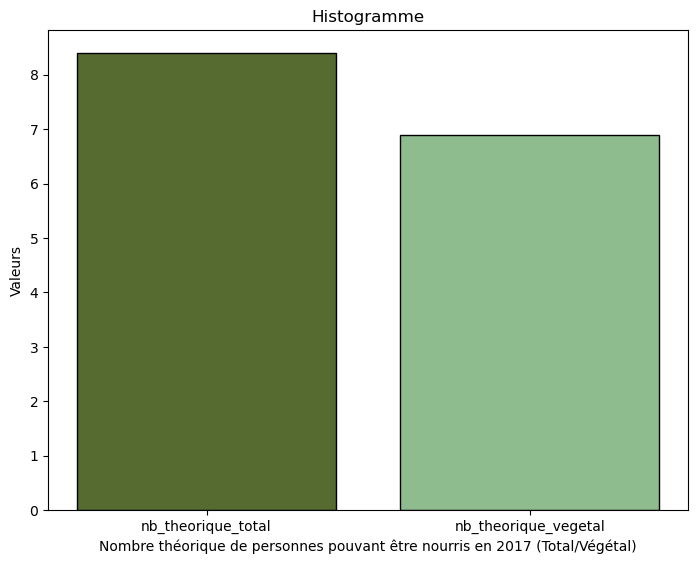

In [104]:
#Faire un graphique en forme d'histogramme
# Préparation de la figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

etiquettes = ['nb_theorique_total', 'nb_theorique_vegetal']
valeurs = [8.4,6.9]

# Affichage des données
ax.bar(etiquettes, valeurs,color=[
       'darkolivegreen', 'darkseagreen'], edgecolor="black")


plt.title("Histogramme")  # Titre du graphique
plt.ylabel('Valeurs')  # Titre de l'axe y
plt.xlabel('Nombre théorique de personnes pouvant être nourris en 2017 (Total/Végétal)') #titre de l'axe x
plt.show()  # Affichage d'une courbe

In [105]:
#Calcul de la dispo intérieur humaine
#Disponibilité total intérieur
table_total['Disponibilité intérieure']
#Disponibilité humaines
table_total['Disponibilité humaine']=(table_total['Nourriture']+table_total['Semences']+table_total['Traitement']+table_total['Production'])
#diviser par la catégorie humaine
dispo_int_humain=(table_total['Disponibilité humaine'].sum() / table_total['Disponibilité intérieure'].sum())*100
dispo_int_humain_arr = round(dispo_int_humain,2) #j'arrondis à deux chiffres après la virgule 
print('Pour trouver la disponibilité intérieur humaine, il a fallu additioner la nourriture disponible, les semences, le traitement et la production.')
print("La disponibilité intérieur humaine globlale est de",f"{dispo_int_humain_arr}","par kcal/jour/personne.")

Pour trouver la disponibilité intérieur humaine, il a fallu additioner la nourriture disponible, les semences, le traitement et la production.
La disponibilité intérieur humaine globlale est de 53.76 par kcal/jour/personne.


In [106]:
#Calcul de la dispo intérieur animal
#Disponibilité intérieur total
table_total['Disponibilité intérieure']
#disponibilité pour animaux 
table_total['Aliments pour animaux']
#Diviser par catégorie animaux 
dispo_int_animaux = (table_total['Aliments pour animaux'].sum() / table_total['Disponibilité intérieure'].sum())*100
dispo_int_animaux_arr = round(dispo_int_animaux,2) #j'arrondis à deux chiffres après la virgule 
print('Pour trouver la disponibilité intérieur animale, il a fallu diviser la disponibilité animal par la disponibilité intérieur.')
print("La disponibilité intérieur animale globlale est de",f"{dispo_int_animaux_arr}","par kcal/jour/personne.")

Pour trouver la disponibilité intérieur animale, il a fallu diviser la disponibilité animal par la disponibilité intérieur.
La disponibilité intérieur animale globlale est de 11.7 par kcal/jour/personne.


In [107]:
#Calcul de la dispo intérieur pertes
#Disponibilité intérieur total
table_total['Disponibilité intérieure']
#dispo alimentaire perdues
table_total['Pertes']
#Diviser par catégorie pertes
dispo_int_pertes = (table_total['Pertes'].sum() / table_total['Disponibilité intérieure'].sum())*100
dispo_int_pertes_arr = round(dispo_int_pertes, 2) #arrondi a deux chiffre après la virgule
print('Pour trouver les pertes, il a fallu diviser les pertes par la disponibilité intérieur.')
print("Les pertes globlales sont de",f"{dispo_int_pertes_arr}","par kcal/jour/personne.")

Pour trouver les pertes, il a fallu diviser les pertes par la disponibilité intérieur.
Les pertes globlales sont de 5.0 par kcal/jour/personne.


Réponses pour Julien

In [108]:
#Calcul de la dispo intérieur en traitement 
dispo_int_traitement = (table_total['Traitement'].sum() / table_total['Disponibilité intérieure'].sum())*100
dispo_int_traitement_arr = round(dispo_int_traitement, 2)
print('Pour trouver la dispo intérieur en traitement, il a fallu diviser les traitements par la disponibilité intérieur.')
print("La disponibilité intérieur en traitement globlale est de",f"{dispo_int_traitement_arr}","par kcal/jour/personne.")

Pour trouver la dispo intérieur en traitement, il a fallu diviser les traitements par la disponibilité intérieur.
La disponibilité intérieur en traitement globlale est de 21.01 par kcal/jour/personne.


In [109]:
#Calcul de la dispo intérieur en semence
dispo_int_semence = (table_total['Semences'].sum() / table_total['Disponibilité intérieure'].sum())*100
dispo_int_semence_arr = round(dispo_int_semence, 2)
print('Pour trouver la dispo intérieur en semence, il a fallu diviser les semences par la disponibilité intérieur.')
print("La disponibilité intérieur en semences globlale est de",f"{dispo_int_semence_arr}","par kcal/jour/personne.")

Pour trouver la dispo intérieur en semence, il a fallu diviser les semences par la disponibilité intérieur.
La disponibilité intérieur en semences globlale est de 1.6 par kcal/jour/personne.


In [110]:
#Calcul de la dispo intérieur en autres utilisations
dispo_int_autres = (table_total['Autres Utilisations'].sum() / table_total['Disponibilité intérieure'].sum())*100
dispo_int_autres_arr = round(dispo_int_autres, 2)
print('Pour trouver la dispo intérieur en autres utilisations, il a fallu diviser autres utilisations par la disponibilité intérieur.')
print("La disponibilité intérieur en autres utilisations globlale est de",f"{dispo_int_autres_arr}","par kcal/jour/personne.")

Pour trouver la dispo intérieur en autres utilisations, il a fallu diviser autres utilisations par la disponibilité intérieur.
La disponibilité intérieur en autres utilisations globlale est de 7.42 par kcal/jour/personne.


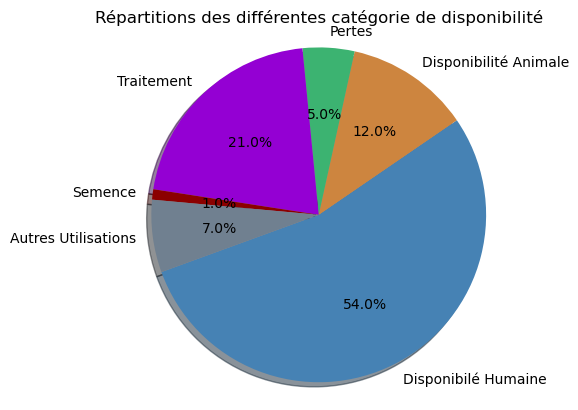

In [111]:
#camembert qui regroupe les pourcentages des différentes parts
labels = 'Disponibilé Humaine', 'Disponibilité Animale', 'Pertes', 'Traitement','Semence','Autres Utilisations'
sizes = [54, 12, 5, 21, 1, 7]
colors = ['steelblue', 'peru', 'mediumseagreen', 'darkviolet','darkred','slategray']
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title('Répartitions des différentes catégorie de disponibilité')
plt.savefig('PieChart01.png')
plt.show()

In [112]:
#filtre sur la Thailande
popu_sounut_thailande = popu_sounut.loc[popu_sounut['Pays'] == 'Thaïlande']
#Calcul de la proportion de personnes en sous nutrition en Thailande
proportion_popu_sousnut_thai = (popu_sounut_thailande['Sous_alim(M_hab)'].sum() / (popu_sounut_thailande['Population(K)'].sum()))*100
proportion_popu_sousnut_thai_arr = round(proportion_popu_sousnut_thai, 2)
print(proportion_popu_sousnut_thai_arr)

8.91


In [113]:
#filtre sur le manioc et la thailande
manioc_thai =  table_total.loc[(table_total['Pays'] == 'Thaïlande') & (table_total['Produit'] == 'Manioc') ]
#dispo intérieur              
#table_total['Disponibilité intérieure']
#calcul de la part exporter de manioc en thailande
export_manioc_thai =  manioc_thai['Exportations - Quantité'].sum() / manioc_thai['Production'].sum()*100
export_manioc_thai_arr = round(export_manioc_thai,2)
print(export_manioc_thai_arr)

83.41


In [114]:
print("La part d'exportation du manioc face à la production est de", f"{export_manioc_thai_arr}","%.")
print("Soit l'importance d'exporter du manioc pour un pays comme la Thaïlande avec sa proportion de personne en sous nutrition de", f"{proportion_popu_sousnut_thai_arr}","%.")

La part d'exportation du manioc face à la production est de 83.41 %.
Soit l'importance d'exporter du manioc pour un pays comme la Thaïlande avec sa proportion de personne en sous nutrition de 8.91 %.


Réponses pour Mélanie

In [115]:
#pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
proportion_par_zone = popu_sounut.loc[popu_sounut['Année'] == 2017]
#calcul proportion
proportion_par_zone['Proportion par zone'] = (proportion_par_zone['Sous_alim(M_hab)'] / proportion_par_zone['Population(K)'] )*100
resultat_2017 = proportion_par_zone.sort_values(by = 'Proportion par zone', ascending = False)
resultat_2017.head(10)

C:\Users\Jonathan.Gourville\AppData\Local\Temp\ipykernel_21176\2106532502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proportion_par_zone['Proportion par zone'] = (proportion_par_zone['Sous_alim(M_hab)'] / proportion_par_zone['Population(K)'] )*100


,Pays,Année,Population(K),Sous_alim(M_hab),Proportion par zone
472,Haïti,2017,10982366.0,5300000.0,48.259182
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.188685
652,Madagascar,2017,25570512.0,10500000.0,41.062924
622,Libéria,2017,4702226.0,1800000.0,38.279742
604,Lesotho,2017,2091534.0,800000.0,38.249438
1102,Tchad,2017,15016753.0,5700000.0,37.957606
970,Rwanda,2017,11980961.0,4200000.0,35.055619
730,Mozambique,2017,28649018.0,9400000.0,32.810898
1120,Timor-Leste,2017,1243258.0,400000.0,32.173531
4,Afghanistan,2017,36296113.0,10500000.0,28.928718


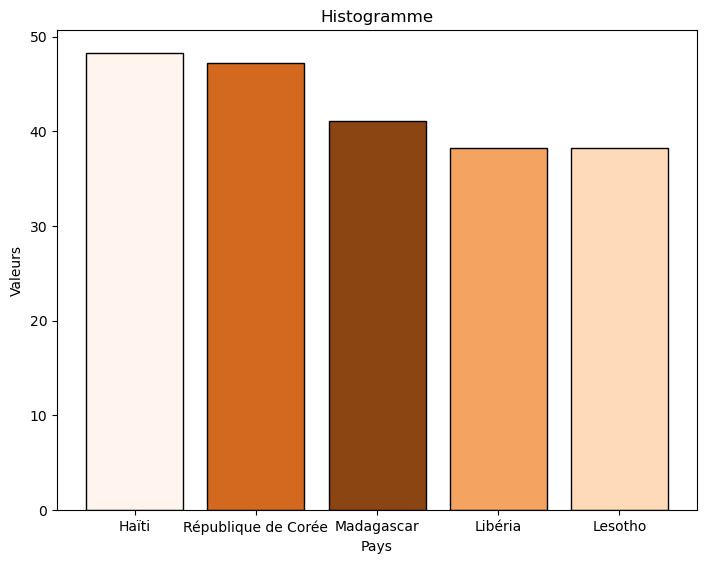

In [116]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

etiquettes = ['Haïti', 'République de Corée','Madagascar','Libéria','Lesotho']
valeurs = [48.26,47.19,41.07,38.28,38.25]

# Affichage des données
ax.bar(etiquettes, valeurs,color=[
       'seashell', 'chocolate','saddlebrown','sandybrown','peachpuff'], edgecolor="black")


plt.title("Histogramme")  # Titre du graphique
plt.ylabel('Valeurs')  # Titre de l'axe y
plt.xlabel('Pays') #Titre de l'axe x
plt.show()  # Affichage d'une courbe

In [117]:
#ceux qui ont le plus bénéficié d’aide depuis 2013
aide_alimentaire_2013= aide_alimentaire.groupby(by=['Pays'])[['Cate_prod','Quantite(T)']].sum()
resultat_aide_ali_2013 = aide_alimentaire_2013.sort_values(by ='Quantite(T)',ascending=False)
print("Pays ayant le plus bénéficier d'aide depuis 2013: \n", f"{resultat_aide_ali_2013.head(10)}")

Pays ayant le plus bénéficier d'aide depuis 2013: 
                                   Quantite(T)
Pays                                         
République arabe syrienne          1858943000
Éthiopie                           1381294000
Yémen                              1206484000
Soudan du Sud                       695248000
Soudan                              669784000
Kenya                               552836000
Bangladesh                          348188000
Somalie                             292678000
République démocratique du Congo    288502000
Niger                               276344000


In [118]:
#ceux ayant le plus de disponibilité/habitant
print("Listes des pays ayant le plus de disponibilité par habitants depuis 2013: \n", f"{dispo_total_2017.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False).head(20)}")

Listes des pays ayant le plus de disponibilité par habitants depuis 2013: 
 Pays
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Irlande                  3602.0
Italie                   3578.0
Luxembourg               3540.0
Égypte                   3518.0
Allemagne                3503.0
Canada                   3499.0
Koweït                   3499.0
Monténégro               3490.0
Norvège                  3483.0
France                   3482.0
Portugal                 3472.0
Pologne                  3450.0
Lituanie                 3414.0
Maroc                    3402.0
Cuba                     3402.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64


In [119]:
#Pays ayant le moins de disponibilité par habitants
print("Listes des pays ayant le plus de disponibilité par habitants depuis 2013: \n", f"{dispo_total_2017.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=True).head(20)}")

Listes des pays ayant le plus de disponibilité par habitants depuis 2013: 
 Pays
République centrafricaine                     1879.0
Zambie                                        1924.0
Madagascar                                    2056.0
Afghanistan                                   2087.0
Haïti                                         2089.0
République populaire démocratique de Corée    2093.0
Tchad                                         2109.0
Zimbabwe                                      2113.0
Ouganda                                       2126.0
Timor-Leste                                   2129.0
Éthiopie                                      2129.0
Namibie                                       2166.0
Tadjikistan                                   2199.0
République-Unie de Tanzanie                   2204.0
Kenya                                         2205.0
Libéria                                       2206.0
Congo                                         2206.0
Yémen             